In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('karriere-at.csv')
df.head()

,Unnamed: 0,title,text,url
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",https://www.karriere.at/jobs/6431312
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,https://www.karriere.at/jobs/6199814
2,2,Senior Java Entwickler (m/w/d) bei Computer Fu...,Senior Java Entwickler (m/w/d) Java Entwickler...,https://www.karriere.at/jobs/6490925
3,3,(Senior) Java Developer (m/w) bei TODAY Expert...,(Senior) Java Developer (m/w) to>day is your d...,https://www.karriere.at/jobs/6472427
4,4,Java Fullstack Developer (m/w/d) - Softwareent...,Wien Festanstellung Direktvermittlung Jobnr. 4...,https://www.karriere.at/jobs/6506291


In [ ]:
df=df.drop("url", axis='columns')

In [ ]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText  

In [ ]:
df['cleaned_re'] = df['text'].apply(lambda x:cleanDescription(x))
df.head() 

,Unnamed: 0,title,text,cleaned_re
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",du hast gerade deine ausbildung an der htl uni...
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,senior java software developer d w m wien als ...
2,2,Senior Java Entwickler (m/w/d) bei Computer Fu...,Senior Java Entwickler (m/w/d) Java Entwickler...,senior java entwickler m w d java entwickler m...
3,3,(Senior) Java Developer (m/w) bei TODAY Expert...,(Senior) Java Developer (m/w) to>day is your d...,senior java developer m w to day is your day ...
4,4,Java Fullstack Developer (m/w/d) - Softwareent...,Wien Festanstellung Direktvermittlung Jobnr. 4...,wien festanstellung direktvermittlung jobnr un...


In [ ]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [ ]:
df['cleaned_text'] = df['cleaned_re'].apply(lambda x:text_clean_2(x))
df.head(2)

,Unnamed: 0,title,text,cleaned_re,cleaned_text
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",du hast gerade deine ausbildung an der htl uni...,du hast gerade deine ausbildung der htl uni od...
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,senior java software developer d w m wien als ...,senior java software developer w wien al inter...


In [ ]:
df=df.drop("cleaned_re", axis='columns')
df

,Unnamed: 0,title,text,cleaned_text
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",du hast gerade deine ausbildung der htl uni od...
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,senior java software developer w wien al inter...
2,2,Senior Java Entwickler (m/w/d) bei Computer Fu...,Senior Java Entwickler (m/w/d) Java Entwickler...,senior java entwickler w java entwickler w wie...
3,3,(Senior) Java Developer (m/w) bei TODAY Expert...,(Senior) Java Developer (m/w) to>day is your d...,senior java developer w day day today expert o...
4,4,Java Fullstack Developer (m/w/d) - Softwareent...,Wien Festanstellung Direktvermittlung Jobnr. 4...,wien festanstellung direktvermittlung jobnr un...
...,...,...,...,...
862,862,Web Developer bei ADF International Austria ge...,Everyone says they want to change the world. W...,everyone say want change world looking people ...
863,863,Support Engineer (f/m/d) bei DIMOCO Payments G...,"DIMOCO, founded in 2000, is a regulated paymen...",dimoco founded regulated payment company hold ...
864,864,Lehre Applikationsentwicklung - Coding bei eur...,STARTE DEINE KARRIERE! LEHRE APPLIKATIONSENTWI...,starte deine karriere lehre applikationsentwic...
865,865,Senior Big Data Engineer (m/w/d) bei STIWA Gro...,"Die STIWA Group, mit rund 2.300 MitarbeiterInn...",die stiwa group mit rund mitarbeiterinnen ist ...


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df.to_csv('/content/drive/My Drive/Cleaned_karriere-at.csv', encoding='utf-8', index=False)

In [ ]:
cell_text = print(df["cleaned_text"].values[3])
print(cell_text)

senior java developer w day day today expert ober sterreich gmbh ist ein sterreichisches projektberatungsunternehmen da sich auf expertinnen im bereich spezialisiert hat wir suchen laufend hochqualifizierte und erfahrene fachkr fte zur erweiterung unseres expertinnen team linz und wels suchen wir ab sofort jeweils einen senior java developer w aufgaben mitarbeit bei der abwechslungsreichen entwicklung von java web applikationen al teil eines scrum team je nach pr ferenz al fullstack frontend oder backend entwickler implementierung von neuentwicklungen dokumentation und mitarbeit bei der qualit tssicherung anforderungen abgeschlossene ausbildung im bereich softwareentwicklung htl fh uni und mehrj hrige einschl gige berufserfahrung fundierte java kenntnisse zumindest gute kenntnisse im bereich g ngiger datenbanken lernbereitschaft teamf higkeit und selbstst ndige arbeitsweise benefit arbeitsplatz ist ffentlich sehr gut erreichbar kantine flexible arbeitszeiten fundierte strukturierte ein

In [ ]:
df.shape

(867, 4)

In [ ]:
#getting the entire resume text
corpus=" "
for i in range(0,867):
    corpus= corpus+ df["cleaned_text"][i]

In [ ]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
new_text = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(new_text))

Old length:  2447795
New length:  1493812


In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('w+')
#Tokenizing the text
tokens = nltk.word_tokenize(new_text)
#tokens = tokenizer.tokenize(corpus)
len(new_text)


1493812

In [ ]:
new_text

'gerade abgeschlossen siehst perfekten einsteigerposition willst higkeiten java demonstrieren gleichzeitig ausbauen weiterentwickeln entwicklungsteam richtigen adresse junior entwickler sechsmonatigen schulungsprogramm prototypen proof concept projekte erstellen rahmen agilen projektteams enterprise software weiterentwickeln informatik informatik solide grundlagen java jse sql html cs javascript schulungsprogramm n hergebracht angular react bootstrap spring boot eclipse intellij idea jsf jpa hibernate cdi rest maven gradle git unix linux grundlagen jira confluence docker aws scrum workshop ca jahr eigenes budget hardware gesellige dienstleistungs wollzeile og wiensenior java software developer internationale familienunternehmen diversit wichtig gilt ganze summe teile tr erfolg unabh geschlecht herkunft kultur hautfarbe grund bewerbungen angabe informationen geschickt ebcont ebcont hrender sterreichischer dienstleister branchen einschlie lich ffentlichen sektors digitalisierung ftskriti

In [ ]:
freq_dist = nltk.FreqDist(tokens)
mostcommon = freq_dist.most_common(1000)
mostcommon

[('team', 1994),
 ('software', 1416),
 ('java', 1078),
 ('entwicklung', 961),
 ('berufserfahrung', 654),
 ('development', 603),
 ('developer', 547),
 ('javascript', 440),
 ('sql', 360),
 ('cloud', 359),
 ('management', 358),
 ('softwareentwicklung', 346),
 ('framework', 334),
 ('agilen', 331),
 ('engineer', 331),
 ('umfeld', 330),
 ('application', 313),
 ('tool', 311),
 ('angular', 309),
 ('deutsch', 290),
 ('product', 289),
 ('support', 287),
 ('informatik', 283),
 ('projekte', 281),
 ('frontend', 281),
 ('data', 278),
 ('n', 272),
 ('code', 251),
 ('html', 246),
 ('entwickler', 238),
 ('spring', 229),
 ('senior', 225),
 ('digital', 222),
 ('backend', 219),
 ('cs', 217),
 ('entwickeln', 206),
 ('scrum', 197),
 ('agile', 197),
 ('projekten', 192),
 ('typescript', 185),
 ('technical', 183),
 ('innovative', 182),
 ('devops', 179),
 ('react', 171),
 ('security', 170),
 ('technischen', 167),
 ('git', 158),
 ('kubernetes', 157),
 ('professional', 154),
 ('produkte', 151),
 ('python', 151),


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(new_text)

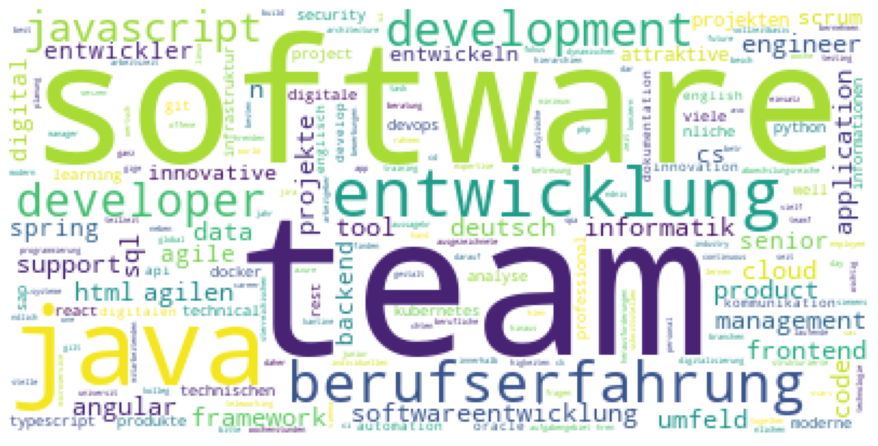

In [ ]:
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)